In [1]:
from sklearn.datasets import load_digits
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import cv2
import PIL.Image
import os

In [3]:
file_names=os.listdir('../seg_data/output/JPEGImages')
print(file_names)

['tile_x004_y009.jpg', 'tile_x003_y021.jpg', 'tile_x008_y009.jpg', 'tile_x002_y012.jpg', 'tile_x010_y009.jpg', 'tile_x005_y008.jpg', 'tile_x013_y001.jpg', 'tile_x002_y011.jpg', 'tile_x008_y023.jpg', 'tile_x003_y005.jpg', 'tile_x004_y007.jpg']


In [4]:
im_list = []
for file_name in file_names:
    im_file = "../seg_data/output/JPEGImages/" + file_name
    im = cv2.imread(im_file)
    print(np.shape(im))
    im = cv2.resize(im,dsize=(1280,960))
    im = im.reshape(1280*960,3)
    #im = im.reshape(1920*2560,3)
    im_list.append(im)
    print(np.shape(im))
print(im_list)

(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
(1920, 2560, 3)
(1228800, 3)
[array([[135, 108,  94],
       [138, 111,  97],
       [136, 109,  95],
       ...,
       [145, 119, 103],
       [147, 121, 105],
       [139, 114,  98]], dtype=uint8), array([[136, 109,  95],
       [135, 108,  94],
       [134, 107,  93],
       ...,
       [140, 116, 104],
       [139, 115, 103],
       [143, 119, 107]], dtype=uint8), array([[139, 112,  91],
       [137, 110,  89],
       [136, 109,  88],
       ...,
       [146, 119,  98],
       [147, 120,  99],
       [153, 126, 105]], dtype=uint8), array([[139, 111,  94],
       [137, 109,  92],
       [138, 110,  93],
       ...,
       [149, 122, 101],
       [147, 120,  99],
       [144, 120,  98]], dtype=uint

In [5]:
seg_list = []
for file_name in file_names:
    seg_file = "../seg_data/output/SegmentationClassPNG/" + os.path.splitext(file_name)[0]+'.png'
    seg = np.asarray(PIL.Image.open(seg_file))
    seg = cv2.resize(seg,dsize=(1280,960))
    seg = seg.reshape(960*1280)
    #seg = cv2.resize(seg,dsize=(320,240))
    #seg = seg.reshape(240*320)
    #seg = seg.reshape(1920*2560)
    seg_list.append(seg)
    print(seg)
    print(np.shape(seg))
print(seg_list)

[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[0 0 0 ... 0 0 0]
(1228800,)
[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]


In [6]:
print(np.shape(seg_list))
print(np.shape(im_list))

(11, 1228800)
(11, 1228800, 3)


In [7]:
seg_concat = np.concatenate(seg_list[:])
im_concat = np.concatenate(im_list[:])
print(np.shape(seg_concat))
print(np.shape(im_concat))

(13516800,)
(13516800, 3)


In [8]:
seg_filtered = seg_concat[seg_concat != 0]
im_filtered = im_concat[seg_concat!=0]
print(np.shape(seg_filtered))
print(np.shape(im_filtered))

(19103,)
(19103, 3)


In [9]:
print(np.unique(seg_filtered))
print(np.count_nonzero(seg_filtered==1))
print(np.count_nonzero(seg_filtered==2))
print(np.count_nonzero(seg_filtered==3))
print(seg_filtered)

[1 2 3 4]
5728
3245
1631
[2 1 1 ... 1 2 2]


In [10]:
embeddings = TSNE(n_components=3,n_jobs=4).fit_transform(im_filtered)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
vis_z = embeddings[:, 2]
print(vis_x)
print(vis_y)
print(vis_z)
print(len(vis_x))
print(len(vis_y))

[36.37562298 33.59003245 36.10393445 ...  6.49009442  1.46612495
  3.77844325]
[ 6.98710666 -0.84715656  7.3487304  ... 28.54822529 23.47617271
 25.86305662]
[  4.62304305   3.05964385   5.00315837 ... -20.65842525 -15.16155746
 -17.87750146]
19103
19103


[2 1 1 ... 1 2 2]


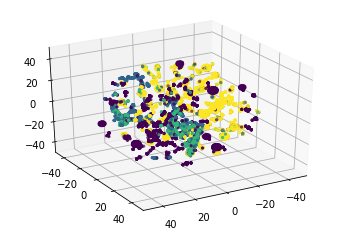

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
print(seg_filtered)
ax.view_init(30, 60)
ax.scatter(vis_x, vis_y, vis_z, c=seg_filtered, marker='.')
plt.show()

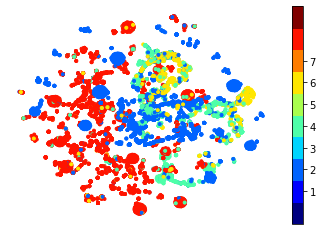

In [12]:
plt.scatter(vis_x, vis_y, c=seg_filtered*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()

In [13]:
import numpy as np

In [14]:
np_list1 = []
for file_name in file_names:
    np_file = "../seg_data/output/1127exp35-1_C3_reduced/" + os.path.splitext(file_name)[0]+'.npy'
    npy = np.load(np_file)
    npy = npy.reshape(240*320,256)
    np_list1.append(npy)
    
np_list2 = []
for file_name in file_names:
    np_file = "../seg_data/output/1127exp35-1_C4_reduced/" + os.path.splitext(file_name)[0]+'.npy'
    npy = np.load(np_file)
    npy = npy.reshape(120*160,256)
    np_list2.append(npy)
    
np_list3 = []
for file_name in file_names:
    np_file = "../seg_data/output/1127exp35-1_C5_reduced/" + os.path.splitext(file_name)[0]+'.npy'
    npy = np.load(np_file)
    npy = npy.reshape(60*80,256)
    np_list3.append(npy)
    
np_list4 = []
for file_name in file_names:
    np_file = "../seg_data/output/1127exp35-1_P3/" + os.path.splitext(file_name)[0]+'.npy'
    npy = np.load(np_file)
    npy = npy.reshape(240*320,256)
    np_list4.append(npy)
    
np_list5 = []
for file_name in file_names:
    np_file = "../seg_data/output/1127exp35-1_P4/" + os.path.splitext(file_name)[0]+'.npy'
    npy = np.load(np_file)
    npy = npy.reshape(120*160,256)
    np_list5.append(npy)
    
np_list6 = []
for file_name in file_names:
    np_file = "../seg_data/output/1127exp35-1_P5/" + os.path.splitext(file_name)[0]+'.npy'
    npy = np.load(np_file)
    npy = npy.reshape(60*80,256)
    np_list6.append(npy)

In [15]:
seg_list1 = []
for file_name in file_names:
    seg_file = "../seg_data/output/SegmentationClassPNG/" + os.path.splitext(file_name)[0]+'.png'
    seg = np.asarray(PIL.Image.open(seg_file))
    seg = cv2.resize(seg,dsize=(320,240))
    seg = seg.reshape(240*320)
    seg_list1.append(seg)
    
seg_list2 = []
for file_name in file_names:
    seg_file = "../seg_data/output/SegmentationClassPNG/" + os.path.splitext(file_name)[0]+'.png'
    seg = np.asarray(PIL.Image.open(seg_file))
    seg = cv2.resize(seg,dsize=(160,120))
    seg = seg.reshape(120*160)
    seg_list2.append(seg)

seg_list3 = []
for file_name in file_names:
    seg_file = "../seg_data/output/SegmentationClassPNG/" + os.path.splitext(file_name)[0]+'.png'
    seg = np.asarray(PIL.Image.open(seg_file))
    seg = cv2.resize(seg,dsize=(80,60))
    seg = seg.reshape(60*80)
    seg_list3.append(seg)

In [16]:
seg_concat1 = np.concatenate(seg_list1[:])
np_concat1 = np.concatenate(np_list1[:])
np_concat4 = np.concatenate(np_list4[:])

seg_concat2 = np.concatenate(seg_list2[:])
np_concat2 = np.concatenate(np_list2[:])
np_concat5 = np.concatenate(np_list5[:])

seg_concat3 = np.concatenate(seg_list3[:])
np_concat3 = np.concatenate(np_list3[:])
np_concat6 = np.concatenate(np_list6[:])

print(np.shape(seg_concat3))
print(np.shape(np_concat3))

(52800,)
(52800, 256)


In [17]:
seg_filtered1 = seg_concat1[seg_concat1 != 0]
np_filtered1 = np_concat1[seg_concat1 !=0]
np_filtered4 = np_concat4[seg_concat1 !=0]

seg_filtered2 = seg_concat2[seg_concat2 != 0]
np_filtered2 = np_concat2[seg_concat2 !=0]
np_filtered5 = np_concat5[seg_concat2 !=0]

seg_filtered3 = seg_concat3[seg_concat3 != 0]
np_filtered3 = np_concat3[seg_concat3 !=0]
np_filtered6 = np_concat6[seg_concat3 !=0]

print(np.shape(seg_filtered3))
print(np.shape(np_filtered3))

(69,)
(69, 256)


In [18]:
print(np.unique(seg_filtered))
print(np.count_nonzero(seg_filtered==1))
print(np.count_nonzero(seg_filtered==2))
print(np.count_nonzero(seg_filtered==3))
#seg_filtered1*=2
#seg_filtered2*=2
#seg_filtered3*=2
print(seg_filtered3)

[1 2 3 4]
5728
3245
1631
[3 2 2 2 3 1 1 2 2 2 2 2 2 4 4 1 1 2 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 2 4 4 4 4 4 4 4 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3]


In [ ]:
embeddings1 = TSNE(n_components=2, n_jobs=4).fit_transform(np_filtered1)
vis_x1 = embeddings1[:, 0]
vis_y1 = embeddings1[:, 1]
vis_z1 = embeddings1[:, 2]

embeddings2 = TSNE(n_components=3, n_jobs=4).fit_transform(np_filtered2)
vis_x2 = embeddings2[:, 0]
vis_y2 = embeddings2[:, 1]
vis_z2 = embeddings2[:, 2]

embeddings3 = TSNE(n_components=3, n_jobs=4).fit_transform(np_filtered3)
vis_x3 = embeddings3[:, 0]
vis_y3 = embeddings3[:, 1]
vis_z3 = embeddings3[:, 2]

embeddings4 = TSNE(n_components=3, n_jobs=4).fit_transform(np_filtered4)
vis_x4 = embeddings4[:, 0]
vis_y4 = embeddings4[:, 1]
vis_z4 = embeddings4[:, 2]

embeddings5 = TSNE(n_components=3, n_jobs=4).fit_transform(np_filtered5)
vis_x5 = embeddings5[:, 0]
vis_y5 = embeddings5[:, 1]
vis_z5 = embeddings5[:, 2]

embeddings6 = TSNE(n_components=3, n_jobs=4).fit_transform(np_filtered6)
vis_x6 = embeddings6[:, 0]
vis_y6 = embeddings6[:, 1]
vis_z6 = embeddings6[:, 2]

[2 1 1 ... 1 2 2]


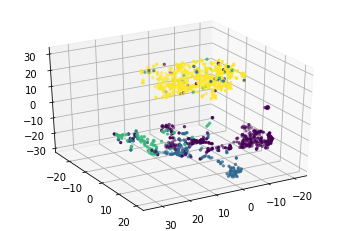

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
print(seg_filtered)
ax.view_init(30,60)
ax.scatter(vis_x1, vis_y1, vis_z1, c=seg_filtered1, marker='.')
plt.show()

[2 1 1 ... 1 2 2]


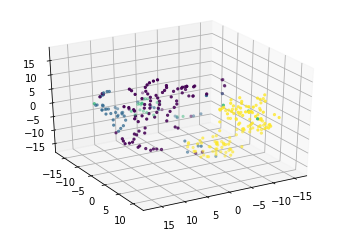

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
print(seg_filtered)
ax.view_init(30, 60)
ax.scatter(vis_x2, vis_y2, vis_z2, c=seg_filtered2, marker='.')
plt.show()

[2 1 1 ... 1 2 2]


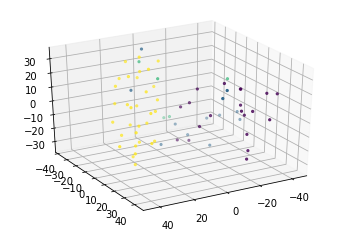

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')
print(seg_filtered)
ax.view_init(30, 60)
ax.scatter(vis_x3, vis_y3, vis_z3, c=seg_filtered3, marker='.')
plt.show()

[2 1 1 ... 1 2 2]


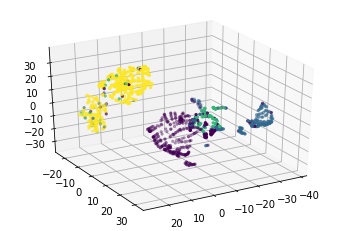

In [23]:
#yellow : BG
#purple: mono
#green: tri
#blue: bi
fig = plt.figure()
ax = fig.gca(projection='3d')
print(seg_filtered)
ax.view_init(30, 60)
ax.scatter(vis_x4, vis_y4, vis_z4, c=seg_filtered1, marker='.')
plt.show()

[2 1 1 ... 1 2 2]


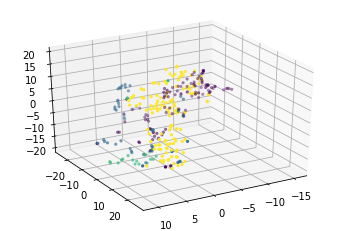

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d')
print(seg_filtered)
ax.view_init(30, 60)
ax.scatter(vis_x5, vis_y5, vis_z5, c=seg_filtered2, marker='.')
plt.show()

[2 1 1 ... 1 2 2]


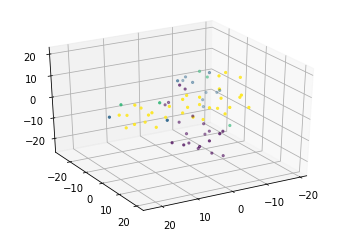

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')
print(seg_filtered)
ax.view_init(30, 60)
ax.scatter(vis_x6, vis_y6, vis_z6, c=seg_filtered3, marker='.')
plt.show()

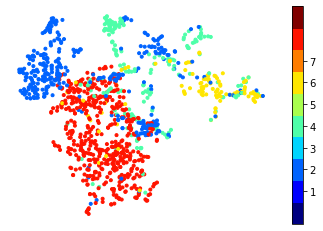

In [35]:
plt.scatter(vis_x1, vis_y1, c=seg_filtered1*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()

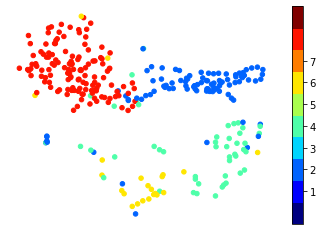

In [50]:
plt.scatter(vis_x2, vis_y2, s=80, c=seg_filtered2*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()

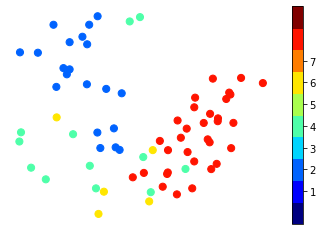

In [48]:
plt.scatter(vis_x3, vis_y3, s=200, c=seg_filtered3*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()

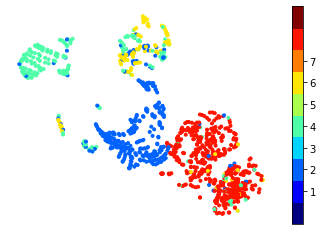

In [38]:
plt.scatter(vis_x4, vis_y4, c=seg_filtered1*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()

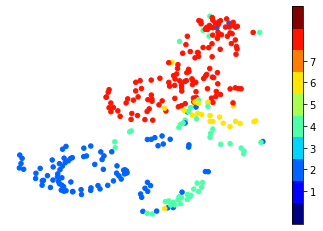

In [51]:
plt.scatter(vis_x5, vis_y5, s=80, c=seg_filtered2*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()

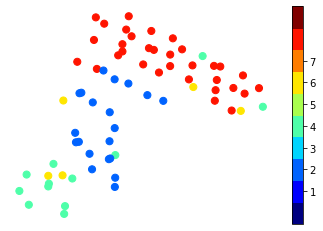

In [52]:
plt.scatter(vis_x6, vis_y6, s=200, c=seg_filtered3*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()

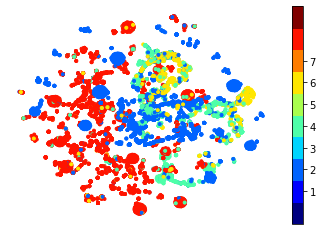

In [41]:
plt.scatter(vis_x, vis_y, c=seg_filtered*2, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.axis('off')
plt.colorbar(ticks=[1,2,3,4,5,6,7])
plt.clim(-0.5, 9.5)
plt.show()